In [71]:
# Step 1: Importing the libraries
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
from sklearn.svm import SVR

symbols = ['GOOGL']
 
all_stocks = pd.DataFrame()

In [72]:
start = pd.Timestamp('2010-01')
end = pd.Timestamp('2020-12')
data_source = 'yahoo'

In [73]:
def get_symbols(symbols,data_source,ohlc,begin_date=None,end_date=None):
    out = []
    new_symbols = []
    
    for symbol in symbols:
        df = web.DataReader(symbol, data_source, begin_date, end_date)\
        [['High','Low','Open','Close','Volume','Adj Close']]
        new_symbols.append(symbol) 
        out.append(df[ohlc].astype('float'))
        data = pd.concat(out, axis = 1)
        data.columns = new_symbols
        
    return data

In [74]:
# Step 2: Importing the dataset

In [75]:
all_stocks = get_symbols(symbols,data_source=data_source,ohlc='Adj Close', begin_date=start, end_date=end)

In [76]:
all_stocks.head()

,GOOGL
Date,
2010-01-04,313.688690
2010-01-05,312.307312
2010-01-06,304.434448
2010-01-07,297.347351
2010-01-08,301.311310


In [77]:
#Create one more column Prediction shifted 15 days up. 
all_stocks['Prediction'] = all_stocks[['GOOGL']].shift(-15)
#print data set
print(all_stocks.tail())

                  GOOGL  Prediction
Date                               
2020-11-24  1763.900024         NaN
2020-11-25  1764.130005         NaN
2020-11-27  1787.020020         NaN
2020-11-30  1754.400024         NaN
2020-12-01  1795.359985         NaN


In [78]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(all_stocks.drop(['Prediction'],1))
#Remove the last 15 rows
X = X[:-15]
print(X)

[[ 313.68869019]
 [ 312.30731201]
 [ 304.43444824]
 ...
 [1762.5       ]
 [1759.72998047]
 [1761.42004395]]


In [81]:
y = np.array(all_stocks['Prediction'])
y = y[:-15]
print(y)

[ 271.48147583  271.32131958  267.41241455 ... 1787.02001953 1754.40002441
 1795.35998535]


In [82]:
# Step 3: Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [83]:
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))
print(X)

[[-1.04956936]
 [-1.05319091]
 [-1.07383115]
 ...
 [ 2.74877086]
 [ 2.74150872]
 [ 2.74593955]]


In [84]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [85]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

/Users/syang14/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000.0, gamma=0.1)

In [86]:
y_pred = svr.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred)

In [87]:
# Returns the coefficient of determination R² of the prediction.
svm_confidence = svr.score(x_test, y_test)
svm_confidence

0.9796730824229576

In [88]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9796730824229576


In [89]:
# Step 7: Comparing the Test Set with Predicted Values
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,452.387390,406.684916
1,758.479980,741.103433
2,1258.150024,1157.420143
3,529.549988,532.859349
4,246.116119,248.176601
5,435.330322,436.314067
6,1125.369995,1121.086273
7,416.176178,396.001672
8,856.750000,842.807032
9,284.334320,337.085377


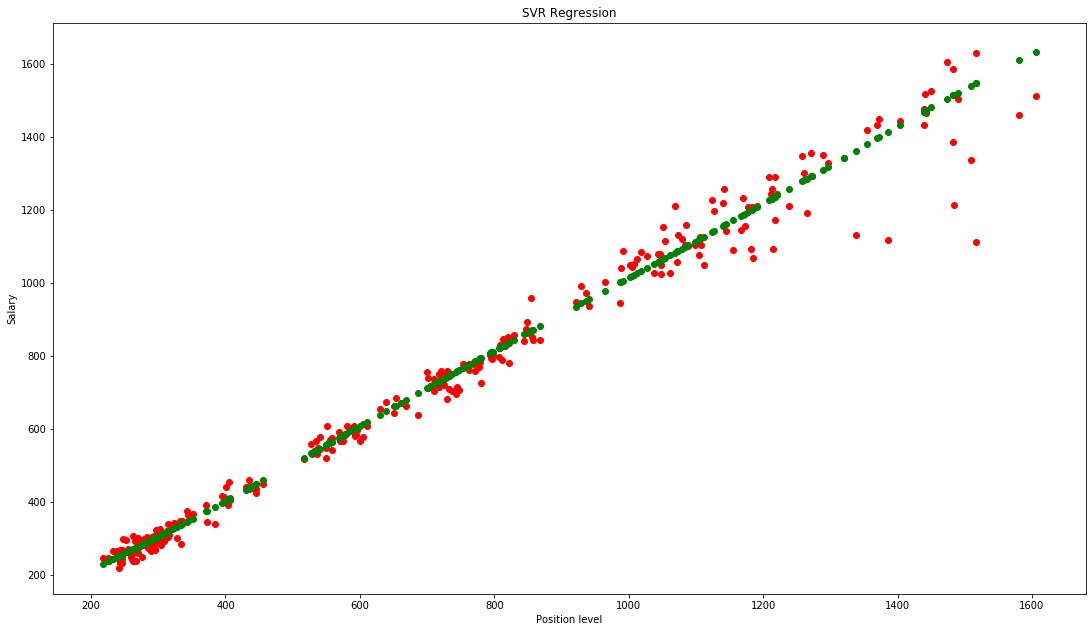

In [90]:
#Step 8: Visualising the SVR results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.rcParams["figure.figsize"] = (18.5, 10.5)
plt.scatter(sc_X.inverse_transform(x_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(x_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()